In [1]:
#Set up the environment
library(tidyverse)
library(reshape2)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from

In [2]:
#Load in the library data
setwd("../data")
all.libraries = c("final_avana.txt", "final_calabrese.txt", "final_dolcetto.txt", "final_gecko.txt", "final_minlibcas.txt", "final_moffat.txt", "final_sanger.txt")

setwd("../data")
library.data.list = NULL
iteration = 1
for(library in all.libraries){
    
    #Load in the data
    library.data.list[[iteration]] = fread(library, sep = "\t", header = T)
    
    #update the loop iteration
    iteration = iteration + 1
}

#Get a vector of sample names
sample.names = library.data.list[[1]] %>% names() %>% .[! . %in% c("seq", "chr", "posL", "posR")]

In [3]:
#Calculate the total number of guides in each library
avana.guides = library.data.list[[1]] %>% nrow()
calabrese.guides = library.data.list[[2]] %>% nrow()
dolcetto.guides = library.data.list[[3]] %>% nrow()
gecko.guides = library.data.list[[4]] %>% nrow()
minilibcas.guides = library.data.list[[5]] %>% nrow()
moffatt.guides = library.data.list[[6]] %>% nrow() 
sanger.guides = library.data.list[[7]] %>% nrow()

In [4]:
#Load in the gnomAD annotation file so that we know which sample belongs to each ancestry group
setwd("../data")
sample.annotation = read.table("gnomad.genomes.v3.1.2.hgdp_1kg_subset_sample_meta.tsv.bgz", sep = "\t", header = T) %>%
select(s, gnomad_population_inference) %>%
mutate(gnomad_population_inference = gsub("\\..*pop", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub("prob..*", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub("..*:", "", gnomad_population_inference)) %>%
mutate(gnomad_population_inference = gsub(",", "", gnomad_population_inference)) %>%
rename("sample" = 1, "ancestry" = 2)

In [5]:
#Get the total number of affected guides for each library
affected.guides.per.individual = NULL
for(i in 1:length(library.data.list)){
    
    #format the library correctly
    affected.guides = library.data.list[[i]] %>%
    select(-seq, -chr, -posL, -posR) %>%
    apply(2, sum)
    
    #Return the output outside of the loop
    affected.guides.per.individual = cbind(affected.guides.per.individual, affected.guides)
    
}

#Now format the data frame correctly
affected.guides.df = affected.guides.per.individual %>%
data.frame() %>%
rownames_to_column("sample") %>%
rename_with(~ c(all.libraries), starts_with("affected.guides")) %>%
inner_join(sample.annotation) 

Joining with `by = join_by(sample)`


In [6]:
#Write affected.guides.df so that we don't need to re-load all of the data each time
setwd("../output")
write.table(affected.guides.df, "figure_4a_affected_guides_df.txt", sep = "\t", col.names = TRUE, row.names = FALSE, quote = FALSE)

In [7]:
#Convert it so that it is the percent of the library that is affected
percent.affected.df = affected.guides.df %>%
mutate("avana" = (final_avana.txt/avana.guides)*100) %>%
mutate("calabrese" = (final_calabrese.txt/calabrese.guides)*100) %>%
mutate("dolcetto" = (final_dolcetto.txt/dolcetto.guides)*100) %>%
mutate("gecko" = (final_gecko.txt/gecko.guides)*100) %>%
mutate("minlibcas" = (final_minlibcas.txt/minilibcas.guides)*100) %>%
mutate("moffatt" = (final_moffat.txt/moffatt.guides)*100) %>%
mutate("sanger" = (final_sanger.txt/sanger.guides)*100) %>%
select(-final_avana.txt, -final_calabrese.txt, -final_dolcetto.txt, -final_gecko.txt, -final_minlibcas.txt, -final_moffat.txt, -final_sanger.txt)

In [9]:
#avana
afr.median.avana = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(avana) %>% median()
other.median.avana = percent.affected.df %>% filter(ancestry != "afr") %>% pull(avana) %>% median()

#calabrese
afr.median.calabrese = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(calabrese) %>% median()
other.median.calabrese = percent.affected.df %>% filter(ancestry != "afr") %>% pull(calabrese) %>% median()

#dolcetto
afr.median.dolcetto = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(dolcetto) %>% median()
other.median.dolcetto = percent.affected.df %>% filter(ancestry != "afr") %>% pull(dolcetto) %>% median()

#gecko
afr.median.gecko = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(gecko) %>% median()
other.median.gecko = percent.affected.df %>% filter(ancestry != "afr") %>% pull(gecko) %>% median()

#minlibcas
afr.median.minlibcas = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(minlibcas) %>% median()
other.median.minlibcas = percent.affected.df %>% filter(ancestry != "afr") %>% pull(minlibcas) %>% median()

#moffatt
afr.median.moffatt = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(moffatt) %>% median()
other.median.moffatt = percent.affected.df %>% filter(ancestry != "afr") %>% pull(moffatt) %>% median()

#sanger
afr.median.sanger = percent.affected.df %>% filter(ancestry %in% "afr") %>% pull(sanger) %>% median()
other.median.sanger = percent.affected.df %>% filter(ancestry != "afr") %>% pull(sanger) %>% median()

#Calculate the ratios
avana.ratio = afr.median.avana/other.median.avana
calabrese.ratio = afr.median.calabrese/other.median.calabrese
dolcetto.ratio = afr.median.dolcetto/other.median.dolcetto
gecko.ratio = afr.median.gecko/other.median.gecko
minlibcas.ratio = afr.median.minlibcas/other.median.minlibcas
moffatt.ratio = afr.median.moffatt/other.median.moffatt
sanger.ratio = afr.median.sanger/other.median.sanger


In [10]:
###First, let's get all of the random NGG data ready.

#Read it back in (for downstream analysis and for re-making the figure)
setwd("../data")
affected.guides.df = read.table("affected_guides_per_gnomad_sample.txt", sep = "\t", header = T)

#Calculate the number of guides in the library
tot.guides = 1000000

#Assemble everything into a single data frame
affected.guides.df = affected.guides.df %>%
rename("sample" = 1, "num_guides" = 2) %>%
inner_join(sample.annotation, by = "sample") %>%
mutate(num_guides = as.numeric(num_guides)) %>%
filter(ancestry != "NA") %>%
mutate(percent_guides = (num_guides/tot.guides)*100)

In [12]:
###Second, let's get all of the AF library ready.

#Load in Aaron's data
setwd("../data")
custom.guides = fread("final_custom_library.txt", header = T)

#Calculate the number of guides in the library
tot.guides.af = nrow(custom.guides)

#calculate the number of affected guides per individual
guides.per.person = custom.guides %>%
select(-seq, -chr, -posL, -posR) %>%
apply(2, sum)

#Get a vector of the names
sample.names = colnames(custom.guides)[5:ncol(custom.guides)]

#Assemble everything into a single data frame
affected.guides.af.df = cbind(sample.names, guides.per.person) %>%
data.frame() %>%
rename("sample" = 1, "num_guides" = 2) %>%
inner_join(sample.annotation, by = "sample") %>%
mutate(num_guides = as.numeric(num_guides)) %>%
filter(ancestry != "NA") %>%
mutate(percent_guides = (num_guides/tot.guides.af)*100)

In [17]:
#Grab the useful information from both of the data frames
random.ngg = affected.guides.df %>%
select(sample, percent_guides)

af.library = affected.guides.af.df %>%
select(sample, percent_guides)

#Then merge them with percent.affected.df
complete.df = percent.affected.df %>%
inner_join(random.ngg, by = "sample") %>%
inner_join(af.library, by = "sample") %>%
rename("random_ngg" = 10, "af_lib" = 11) %>%
relocate(random_ngg, .before = avana)

#set up a vector of factors so that everything is ordered properly
factor.vector = c("random_ngg", "avana", "calabrese", "dolcetto", "gecko", "minlibcas", "moffatt", "sanger", "af_lib")

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”
Using sample, ancestry as id variables

Warning message:
“Removed 144 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 144 rows containing missing values or values outside the scale range
(`geom_bar()`).”


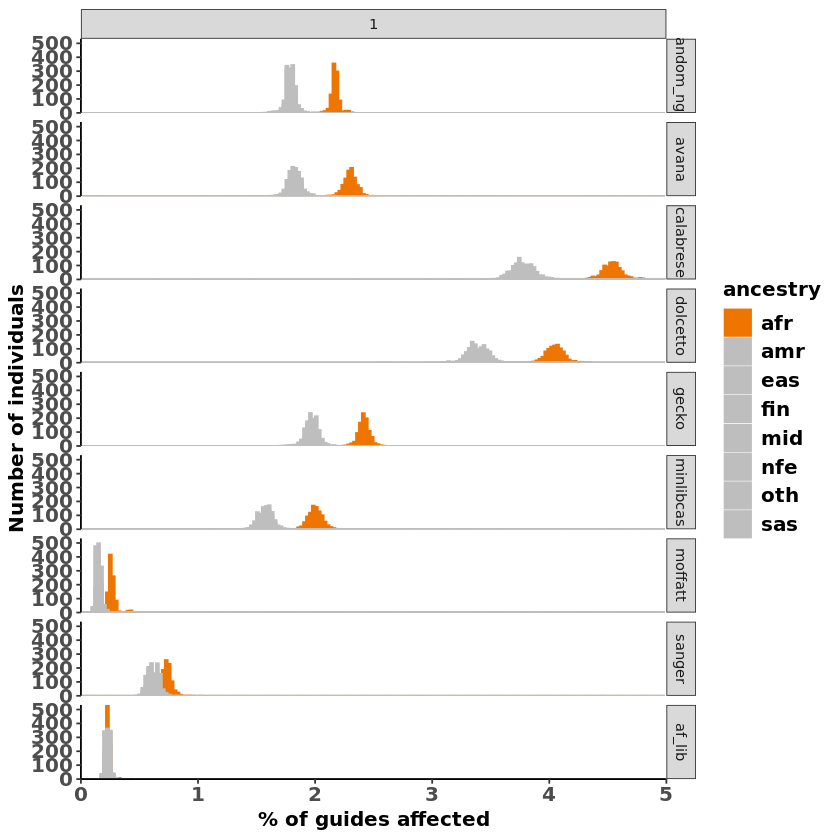

In [18]:
#Plot the top of the plot
complete.df %>%
melt() %>%
filter(ancestry != "NA") %>%
mutate(variable = factor(variable, levels = factor.vector)) %>%
ggplot() +
geom_histogram(aes(x = value, color = ancestry, fill = ancestry), bins = 200, position = "identity") +
facet_grid(variable ~ 1) +
theme_bw() +

scale_color_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +
scale_fill_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +

theme(
panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(color = "black")
) +

theme(
axis.title.x = element_text(color = "black", size = 12, face = "bold"),
axis.title.y = element_text(color = "black", size = 12, face = "bold")
) +

theme(
axis.text=element_text(size = 12, face = "bold"),
axis.title=element_text(size = 12,face = "bold")
) +


theme(
legend.title = element_text(size = 12, face = "bold"),
legend.text = element_text(size = 12, face = "bold")
) +

scale_y_continuous(expand = c(0,0)) +
scale_x_continuous(expand = c(0,0), limits = c(0, 5)) +

ylab("Number of individuals") +
xlab("% of guides affected")


#Put the exported image into the google bucket
setwd("../output")
ggsave("figure_4a_top.pdf", width = 5, height = 7)

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”
Using sample, ancestry as id variables

Warning message:
“Removed 24061 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 24061 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 48 rows containing missing values or values outside the scale range
(`geom_bar()`).”


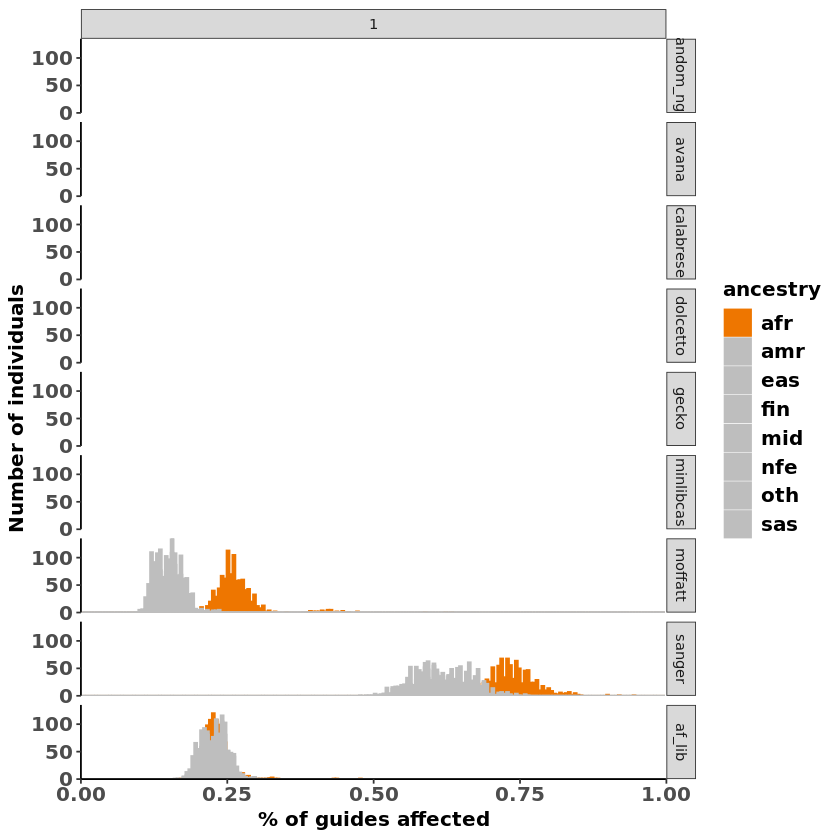

In [20]:
complete.df %>%
melt() %>%
filter(ancestry != "NA") %>%
ggplot() +
geom_histogram(aes(x = value, color = ancestry, fill = ancestry), bins = 200, position = "identity") +
facet_grid(variable ~ 1) +
theme_bw() +

scale_color_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +
scale_fill_manual(values=c("darkorange2", "grey", "grey", "grey", "grey", "grey", "grey", "grey")) +

theme(
panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(color = "black")
) +

theme(
axis.title.x = element_text(color = "black", size = 12, face = "bold"),
axis.title.y = element_text(color = "black", size = 12, face = "bold")
) +

theme(
axis.text=element_text(size = 12, face = "bold"),
axis.title=element_text(size = 12,face = "bold")
) +


theme(
legend.title = element_text(size = 12, face = "bold"),
legend.text = element_text(size = 12, face = "bold")
) +

scale_y_continuous(expand = c(0,0)) +
scale_x_continuous(expand = c(0,0), limits = c(0,1)) +

ylab("Number of individuals") +
xlab("% of guides affected")


#Put the exported image into the google bucket
setwd("../output")
ggsave("figure_4a_bottom.pdf", width = 5, height = 7)

In [22]:
#Write the dataframe for plotting figure 4a
figure_4a_df = complete.df %>%
melt() %>%
filter(ancestry != "NA")

setwd("../output")
write.table(figure_4a_df, "figure_4a_complete_counts.txt", sep = "\t", col.names = TRUE, row.names = FALSE, quote = FALSE)

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”
Using sample, ancestry as id variables



In [21]:
#calculate the median for african and other
african.medians = complete.df %>%
select(-sample) %>%
filter(ancestry %in% "afr") %>%
select(-ancestry) %>%
apply(2, median)

other.medians = complete.df %>%
select(-sample) %>%
filter(ancestry != "afr") %>%
select(-ancestry) %>%
apply(2, median)

differential.median = african.medians/other.medians

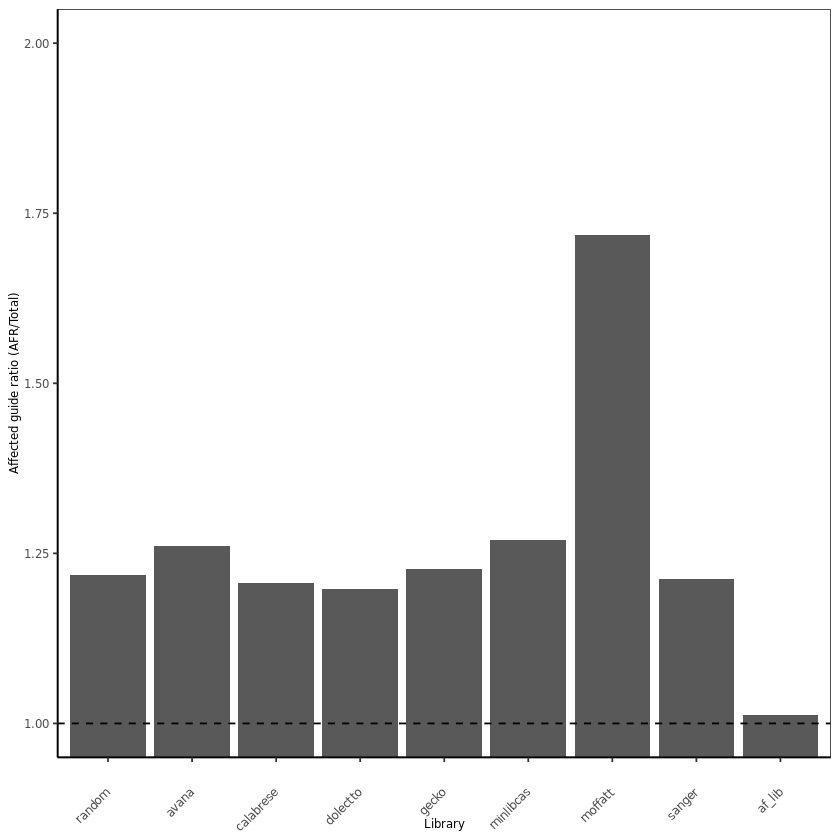

In [24]:
###Make a plotarronie for Figure 3 of the paper
library.name.vector = c("random", "avana", "calabrese", "dolectto", "gecko", "minlibcas", "moffatt", "sanger", "af_lib")

#Bind the two columns together
#And plot the plot
cbind(library.name.vector, differential.median) %>% 
data.frame() %>%
rename("library" = 1, "differential" = 2) %>%
mutate(library = factor(library, levels = library.name.vector)) %>%
mutate(differential = as.numeric(differential)) %>%
ggplot(aes(x = library, y = differential)) +
geom_bar(stat = "identity") +

geom_hline(yintercept = 1, linetype = 2) +

theme_bw() +

theme(
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), 
axis.line = element_line(color = "black")
) +

theme(
axis.title.x = element_text(color = "black", size = 7),
axis.title.y = element_text(color = "black", size = 7)
) +

theme(
axis.text=element_text(size = 7),
axis.title=element_text(size = 7)
) +


theme(
legend.title = element_text(size = 7),
legend.text = element_text(size = 7)
) +

ylab("Affected guide ratio (AFR/Total)") +
xlab("Library") +

theme(
axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 1)
) +

coord_cartesian(ylim = c(1, 2))

#Put the exported image into the google bucket
setwd("../output")
ggsave("figure_4b.pdf", width = 3, height = 3)

In [25]:
#Write the dataframe used for plotting figure 4b
figure_4b_df = cbind(library.name.vector, differential.median) %>% 
data.frame() %>%
rename("library" = 1, "differential" = 2) %>%
mutate(library = factor(library, levels = library.name.vector)) %>%
mutate(differential = as.numeric(differential))

setwd("../output")
write.table(figure_4b_df, "figure_4b_complete_counts.txt", sep = "\t", col.names = TRUE, row.names = FALSE, quote = FALSE)

In [26]:
#Calculate the median number of affected guides across all samples in each library
affected.per.library = percent.affected.df %>%
select(-ancestry) %>%
melt(id = "sample") %>%
group_by(variable) %>%
summarise("percent_affected" = median(value))

affected.per.library

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”


variable,percent_affected
<fct>,<dbl>
avana,1.8440299
calabrese,3.7948196
dolcetto,3.4129130
gecko,1.9882614
minlibcas,1.5983960
moffatt,0.1582070
sanger,0.6225966


In [27]:
#Calculate the affected guide range for avana
affected.guide.min = percent.affected.df %>%
select(-ancestry) %>%
melt(id = "sample") %>%
group_by(variable) %>%
summarise("min" = min(value))

affected.guide.max = percent.affected.df %>%
select(-ancestry) %>%
melt(id = "sample") %>%
group_by(variable) %>%
summarise("min" = max(value))

affected.guide.min
affected.guide.max

Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”
Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(.). In the next version, this warning will become an error.”


variable,min
<fct>,<dbl>
avana,1.1721851
calabrese,2.7146250
dolcetto,2.3676054
gecko,1.3142745
minlibcas,1.0052630
moffatt,0.0644547
sanger,0.3570775


variable,min
<fct>,<dbl>
avana,2.5201270
calabrese,4.9730423
dolcetto,4.4999890
gecko,2.5948496
minlibcas,2.2527916
moffatt,0.6342928
sanger,1.0224013
